# Project Overview

# Importing Basic Libraries

In [1]:
#These are the libraries I typically use in my analysis so I find it easier to import them all at once
#If I need more libraries I will import them as needed

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\kalstedh\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing the Data

In [2]:
#Here we are looking at basic info for our DJIA dataset

pd.read_csv("dji.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3333 non-null   object 
 1   Open       3333 non-null   float64
 2   High       3333 non-null   float64
 3   Low        3333 non-null   float64
 4   Close      3333 non-null   float64
 5   Adj Close  3333 non-null   float64
 6   Volume     3333 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 182.4+ KB


In [3]:
#Here we are actually reading in the dataset

data = pd.read_csv("dji.csv", parse_dates = ["Date"], index_col = "Date")

In [4]:
#Here is a brief look at the dataset

data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000


In [5]:
#Here we are creating a new dataframe with just closing prices from 2010-2020

df = data.loc["2010-01-01": "2020-03-31", "Close"].to_frame()

In [6]:
#Here is a look at our new dataframe

df.head()

,Close
Date,
2010-01-04,10583.959961
2010-01-05,10572.019531
2010-01-06,10573.679688
2010-01-07,10606.860352
2010-01-08,10618.190430


# Data Visualization and Returns

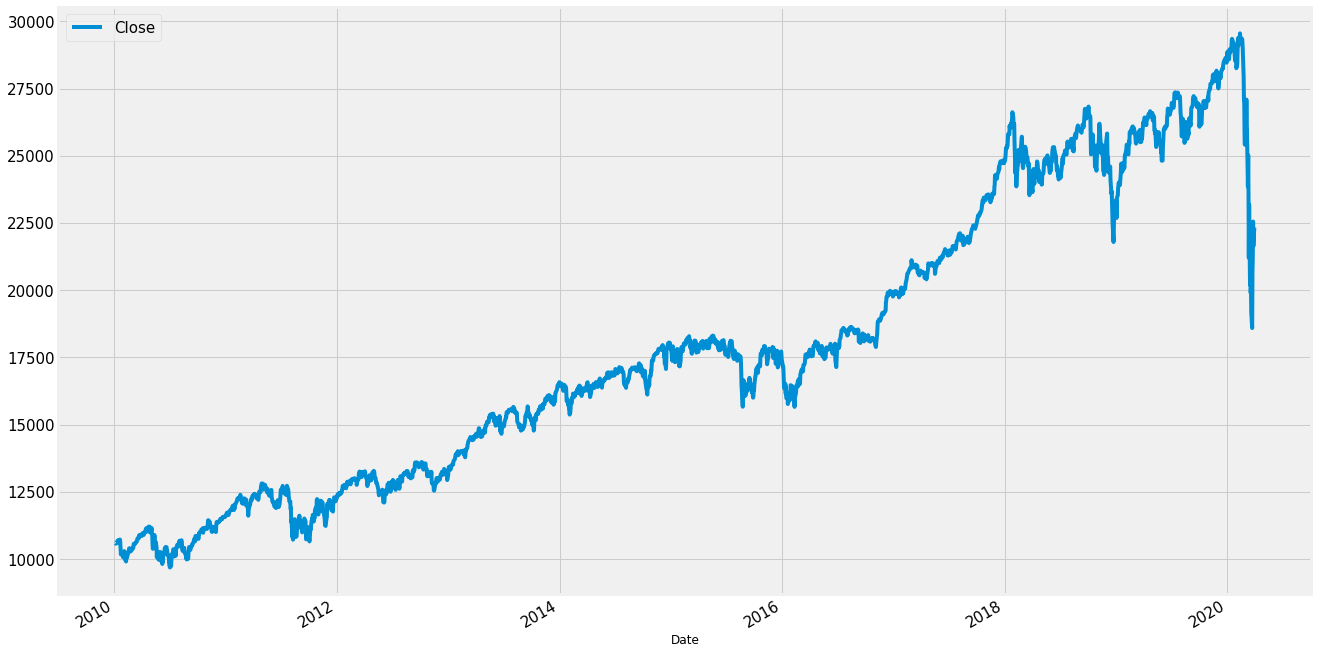

In [7]:
#Here we are plotting the stock market returns in the DJIA from 2010-2020

df.plot(figsize = (20, 12), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [8]:
#Here we are creating a new column called Return that's based on the percentage change of the closing prices

df["Return"] = df.pct_change()

In [9]:
df.head()

,Close,Return
Date,,
2010-01-04,10583.959961,NaN
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068


In [10]:
#Here we are dropping all null values

df.dropna(inplace = True)

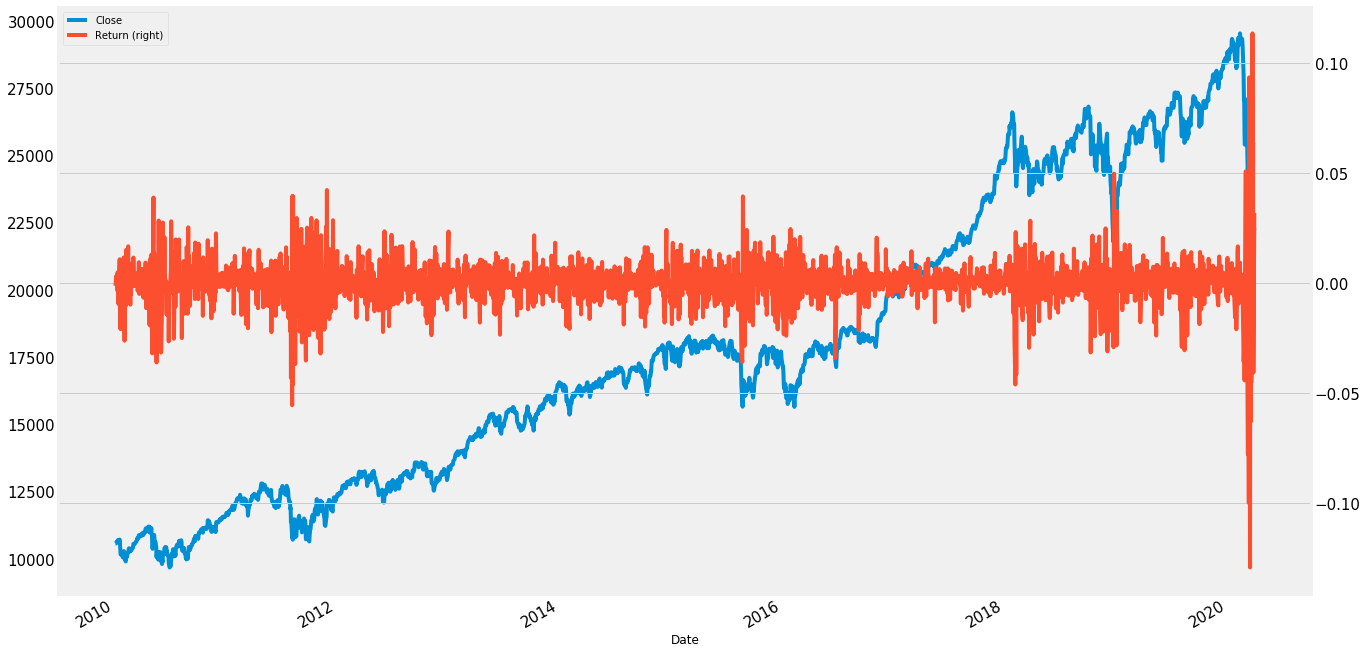

In [11]:
#Here we are plotting overall returns and percentage change

df.plot(figsize = (20, 12), secondary_y = "Return", mark_right = True, fontsize = 15)
plt.show()

In [12]:
#Here we are renaming our columns to DJI Close and DJI Returns

df.rename(columns = {"Close":"DJI_Close", "Return": "DJI_Return"}, inplace = True)

In [13]:
#Here is what our dataframe looks like afterwards

df.head()

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313


# Backtesting a Simple Momentum Strategy

#### Positions

+1: Investing in DJI (long position)
    
-1: Short Selling in DJI (short position)
    
0: No position (neutral)

#### Strategies

Buy and Hold: Basic strategry and passive

#### Simple Momentum

+1: Investing into DJI tomorrow if today's return was positive
    
-1: Short selling DJI tomorrow if today's return was negative

In [14]:
#Here we are creating a new column called "Position"
#It reflects the sign of the DJI_Return column
#If the return was positive, position is 1
#If the return was negative, position is -1

df['Position'] = np.sign(df["DJI_Return"])

In [15]:
#Here is a look at the new dataframe

df.head()

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,-1.0
2010-01-06,10573.679688,0.000157,1.0
2010-01-07,10606.860352,0.003138,1.0
2010-01-08,10618.190430,0.001068,1.0
2010-01-11,10663.990234,0.004313,1.0


In [16]:
#Here we are creating a new column called 'Strategy_Ret' for return
#We are multiplying the position (shifted by one timestamp) times the return
#Pandas dataframe.shift() function Shift index by desired number of periods with an optional time freq. 
#This function takes a scalar parameter called the period, which represents the number of shifts to be
#made over the desired axis. This function is very helpful when dealing with time-series data.

df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [17]:
#Here is the new dataframe with the added strategy-returns

df.head()

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN
2010-01-06,10573.679688,0.000157,1.0,-0.000157
2010-01-07,10606.860352,0.003138,1.0,0.003138
2010-01-08,10618.190430,0.001068,1.0,0.001068
2010-01-11,10663.990234,0.004313,1.0,0.004313


In [18]:
#the numpy method .cumprod() returns the cumulative product of elements along a given axis.
#Here we add 1 to each strategy return. So for 2010-01-06 we have -0.000157 + 1
#If there's no return like for the first value, we fill in the return with 0

df.Strategy_Ret.add(1, fill_value = 0).cumprod()

Date
2010-01-05    1.000000
2010-01-06    0.999843
2010-01-07    1.002981
2010-01-08    1.004052
2010-01-11    1.008383
                ...   
2020-03-24    0.472559
2020-03-25    0.483871
2020-03-26    0.514720
2020-03-27    0.493827
2020-03-30    0.478063
Name: Strategy_Ret, Length: 2576, dtype: float64

In [19]:
#Here we are creating a new column called "Strategy"
#We are multiplying the DJI close times the Strategy_Return column

df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0,0]

In [20]:
df.head()

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1.0,-0.000157,10570.359375
2010-01-07,10606.860352,0.003138,1.0,0.003138,10603.529620
2010-01-08,10618.190430,0.001068,1.0,0.001068,10614.856140
2010-01-11,10663.990234,0.004313,1.0,0.004313,10660.641563


In [21]:
#So, if we had a buy and hold strategy, we would close up (this is shown in DJI_Close)
#If we implemented our buy and SELL strategy, we would be down (this is shown in Strategy)

df.tail()

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2020-03-24,20704.910156,0.113650,1.0,-0.113650,4995.902521
2020-03-25,21200.550781,0.023938,1.0,0.023938,5115.496000
2020-03-26,22552.169922,0.063754,1.0,0.063754,5441.629145
2020-03-27,21636.779297,-0.040590,-1.0,-0.040590,5220.753889
2020-03-30,22327.480469,0.031923,1.0,-0.031923,5054.094112


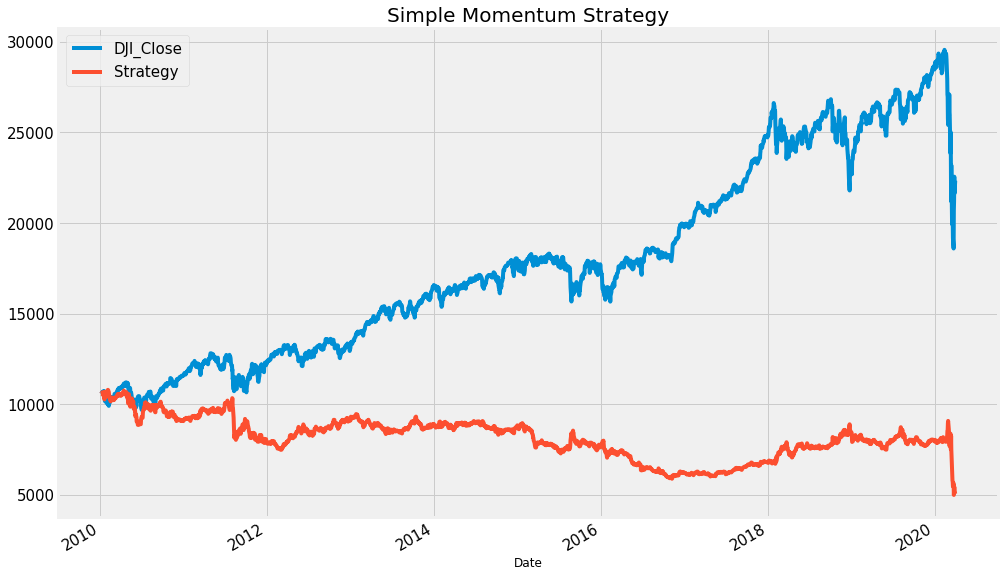

In [22]:
#Here we are plotting the buy and hold vs. the momentum strategy

df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.title("Simple Momentum Strategy", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

In [23]:
#Here we are creating a function to calculate annualized returns

def summary_ann(returns):
    #Here is the mean daily returns and standard deviation for daily returns
    summary = returns.agg(["mean", "std"]).T
    #Here we are mulitplying our returns by the 252 trading days a year for our total returns
    summary["Return"] = summary["mean"] * 252
    #Here we are calculating risk by multiplying the std dev of returns times the square root of 252 trading days
    summary["Risk"] = summary["std"] * np.sqrt(252)
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary

In [24]:
#Here we are applying our function to the DJI Return and Strategy_Ret columns
#Looks like they both have the same risk, but the buy and hold strategy has the better return

summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.087212,0.167896
Strategy_Ret,-0.057966,0.167946


# Backtesting a Contrarian Strategy

#### Simple Contrarian

-1: Short selling DJI tomorrow if today's return was positive
    
1: Investing into DJI tomorrow if today's return was negative

In [25]:
#Here we are basically creating the same dataframe we used to analyze our first investing strategy

df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)

In [26]:
df.head()

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313


In [27]:
#Here we are creating a new column called "Position"
#Similar to what we did on the original strategy, but now the signs are reversed (hence the -np)

df["Position"] = -np.sign(df["DJI_Return"])

In [28]:
#Here is the new dataframe

df.head()

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,1.0
2010-01-06,10573.679688,0.000157,-1.0
2010-01-07,10606.860352,0.003138,-1.0
2010-01-08,10618.190430,0.001068,-1.0
2010-01-11,10663.990234,0.004313,-1.0


In [29]:
#Also like before we will create a column called "Strategy_Ret" to mark our returns

df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [30]:
#Here we are creating a new column called "Strategy"
#We are multiplying the DJI close times the Strategy_Return column

df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0,0]

In [31]:
df.head()

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,-1.0,0.000157,10573.679688
2010-01-07,10606.860352,0.003138,-1.0,-0.003138,10540.499023
2010-01-08,10618.190430,0.001068,-1.0,-0.001068,10529.239831
2010-01-11,10663.990234,0.004313,-1.0,-0.004313,10483.823700


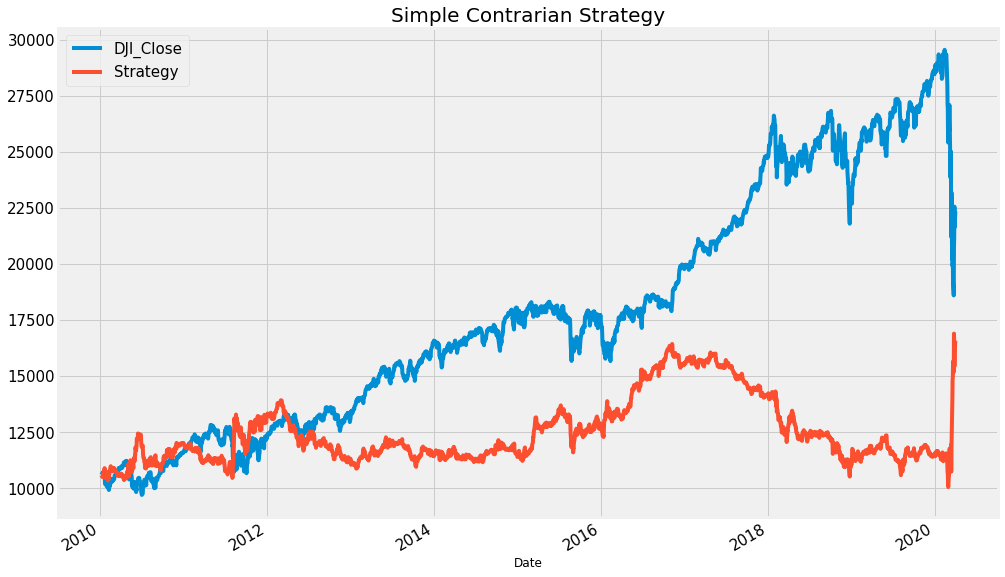

In [32]:
#Here we are plotting the buy and hold vs. the contrarian strategy
#It is interesting to note that our strategy performed it's best during the COVID crisis
#I guess it's good to be contrarian in unstable times

df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.title("Simple Contrarian Strategy", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

In [33]:
#Here we are applying our function to the DJI Return and Strategy_Ret columns
#Looks like they both have the same risk, but the buy and hold strategy has the better return once again

summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.087212,0.167896
Strategy_Ret,0.057966,0.167946


# More Complex Strategies: Backtesting vs. Fitting

In [34]:
#Here we are basically creating the same dataframe we used to analyze our first investing strategy

df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)

In [35]:
#Here we are setting up a position where if the return is greater than one percent, we short the next day
#If not, then we buy

df["Position"] = np.where(df["DJI_Return"] > 0.01, -1, 1)

In [36]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [37]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0,0]

In [38]:
df.head()

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,1,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1,0.000157,10573.679688
2010-01-07,10606.860352,0.003138,1,0.003138,10606.860352
2010-01-08,10618.190430,0.001068,1,0.001068,10618.190430
2010-01-11,10663.990234,0.004313,1,0.004313,10663.990234


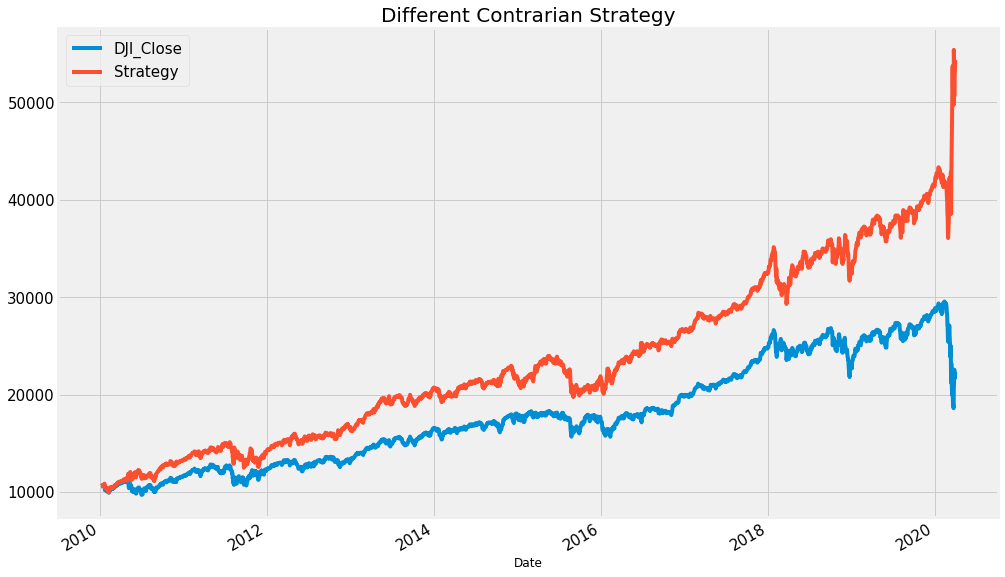

In [39]:
#Here we are plotting the buy and hold vs. the contrarian strategy
#Looks like our contrarian strategy outpeformed buy and hold

df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.title("Different Contrarian Strategy", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

In [40]:
#Here we are applying our function to the DJI Return and Strategy_Ret columns
#Looks like they both have the same risk, but the contrarian strategy has a better return

summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.087212,0.167896
Strategy_Ret,0.174262,0.167659


# Simple Moving Average Part One

In [41]:
#Here we are basically creating the same dataframe we used to analyze our first investing strategy

df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)

In [42]:
#Here we are calculating the moving average of the closing prices in the DJIA
#As you can see there are missing values for the first 50 because obviously there's not 50 days to calculate yet

df.DJI_Close.rolling(window = 50).mean()

Date
2010-01-05             NaN
2010-01-06             NaN
2010-01-07             NaN
2010-01-08             NaN
2010-01-11             NaN
                  ...     
2020-03-24    26708.547930
2020-03-25    26554.417930
2020-03-26    26426.667930
2020-03-27    26278.799102
2020-03-30    26139.395898
Name: DJI_Close, Length: 2576, dtype: float64

In [43]:
#Here we are creating a new column called SMA50 that has the 50 day moving average of the DJI closing prices

df["SMA50"] = df.DJI_Close.rolling(window = 50).mean()

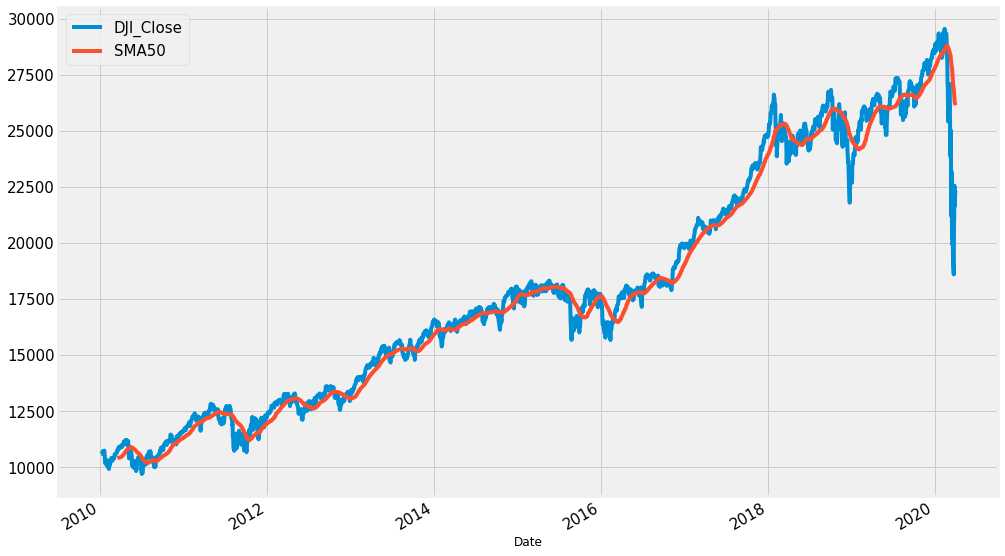

In [44]:
#Here we are plotting the closing price and the 50 day moving average together

df[["DJI_Close", "SMA50"]].plot(figsize = (15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [45]:
#Here we are creating a new column called SMA200 which is the 200 day moving average of the closing prices

df["SMA200"] = df.DJI_Close.rolling(window = 200).mean()

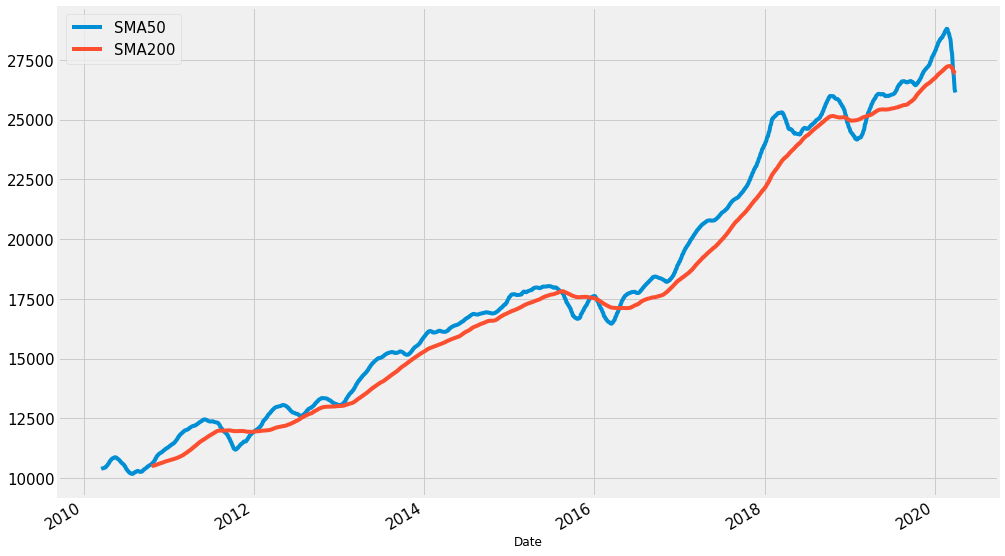

In [46]:
#Here we are plotting the 50 day and 200 day moving averages

df[["SMA50", "SMA200"]].plot(figsize = (15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [47]:
#Here we are dropping all missing values in our dataframe

df.dropna(inplace = True)

# Simple Moving Averages Part Two

In [48]:
#Here we are creating a new column called "Position"
#We are subtracting the 200 day moving average from the 50 day moving average
#Then adding a sign to whatever the difference is

df["Position"] = np.sign(df.SMA50.sub(df.SMA200))

In [49]:
#Here is a brief look at the new dataframe

df.head()

,DJI_Close,DJI_Return,SMA50,SMA200,Position
Date,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,1.0
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,1.0
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,1.0
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,1.0
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,1.0


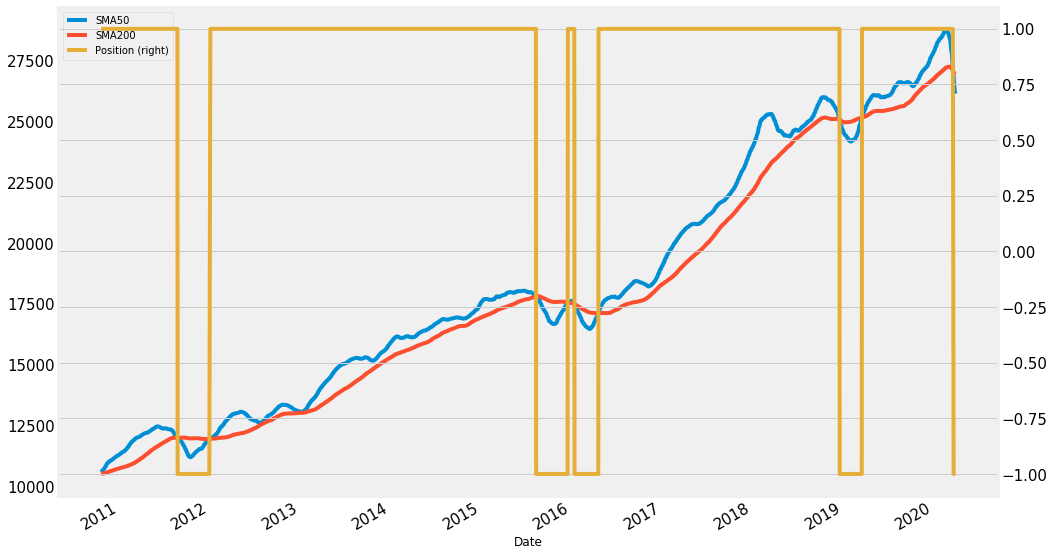

In [50]:
#Here we are plotting the 50 day MA, the 200 day MA, and the position

df[["SMA50", "SMA200", "Position"]].plot(figsize = (15,10), secondary_y = "Position", fontsize = 15)
plt.show()

In [51]:
#Here we are creating a separate column called "Strategy_Ref"
#We are multiplying a shift in position times the normal DJI return

df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [52]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0,0]

In [53]:
df.head()

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,1.0,NaN,10978.620117
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,1.0,0.011782,11107.969727
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,1.0,0.003475,11146.570312
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,1.0,-0.001257,11132.559570
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,1.0,0.002829,11164.049805


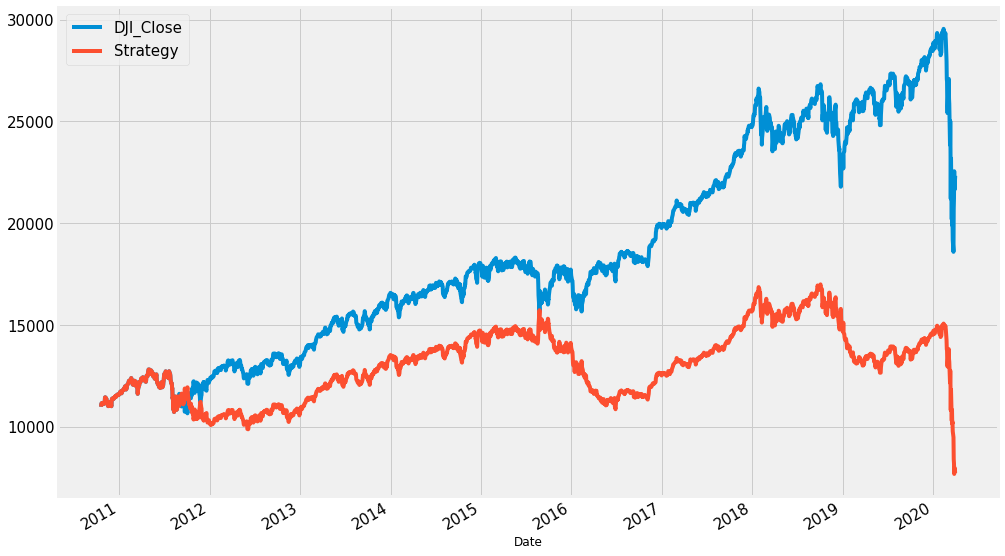

In [54]:
#Here we are plotting the closing price and the strategy together

df[["DJI_Close", "Strategy"]].plot(figsize = (15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [55]:
#Here we are applying our function to the DJI Return and Strategy_Ret columns
#Looks like they both have the same risk, but the DJI Return has a better return

summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.087819,0.167604
Strategy_Ret,-0.022887,0.167655


In [56]:
#Here we are flipping Position to be the reverse sign of the 50 day moving average minus the 200 day moving average

df["Position"] = -np.sign(df.SMA50.sub(df.SMA200))

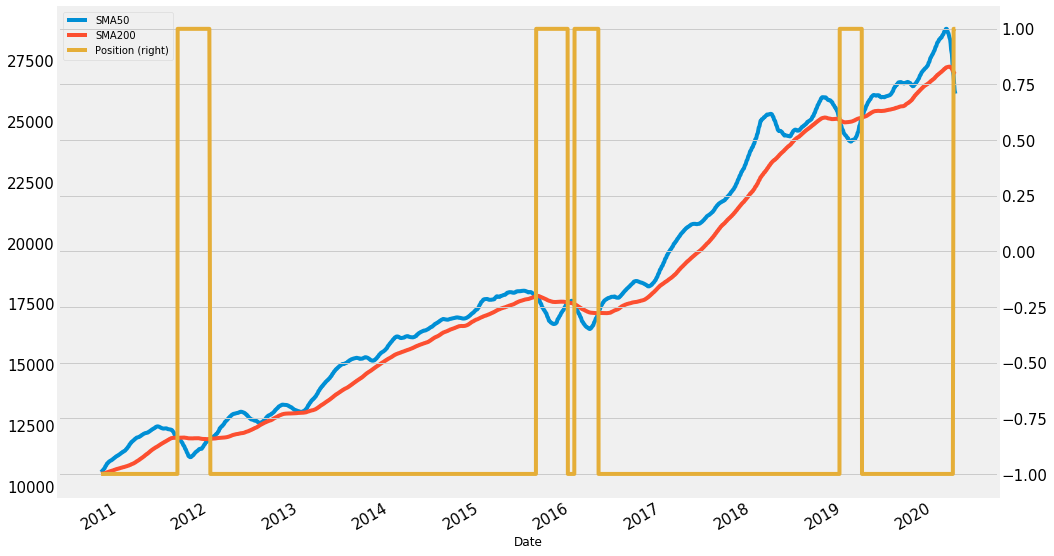

In [57]:
#Here we are plotting the 50 day MA, the 200 day MA, and the position

df[["SMA50", "SMA200", "Position"]].plot(figsize = (15,10), secondary_y = "Position", fontsize = 15)
plt.show()

In [58]:
#Here we are creating a separate column called "Strategy_Ref"
#We are multiplying a shift in position times the normal DJI return

df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [59]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0,0]

In [60]:
df.head()

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,-1.0,NaN,10978.620117
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,-1.0,-0.011782,10849.270508
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,-1.0,-0.003475,10811.568911
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,-1.0,0.001257,10825.158571
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,-1.0,-0.002829,10794.537870


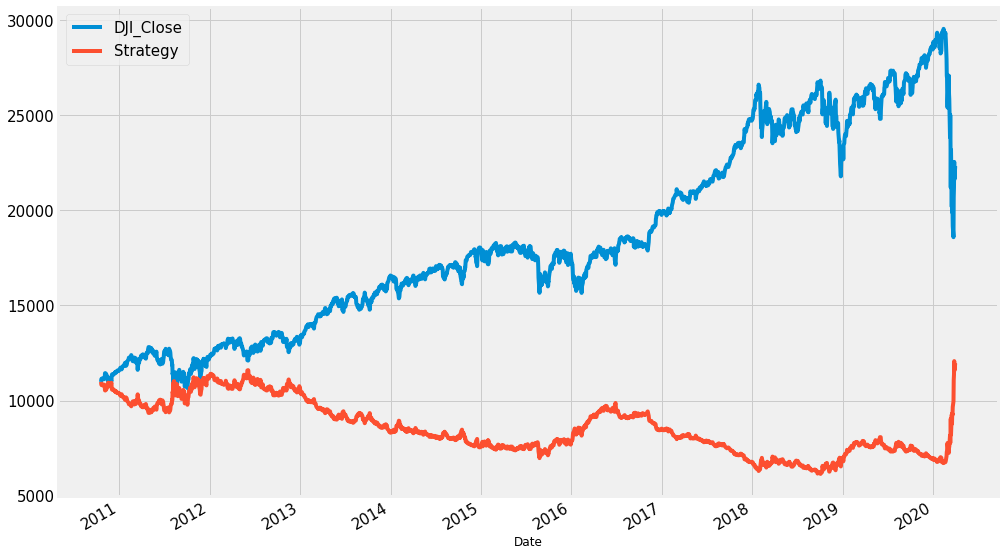

In [61]:
#Here we are plotting the closing price and the strategy together

df[["DJI_Close", "Strategy"]].plot(figsize = (15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [62]:
#Here we are applying our function to the DJI Return and Strategy_Ret columns
#Looks like they both have the same risk, but the DJI Return has a better return

summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.087819,0.167604
Strategy_Ret,0.022887,0.167655


# Backtesting the Perfect Strategy

In [70]:
#Here we are basically creating the same dataframe we used to analyze our first investing strategy

df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)

In [71]:
df["Position"] = np.sign(df["DJI_Return"])

In [72]:
#Here we are creating our perfect strategy
#Notice no shifting in position
#We are seeing what it would be like to predict the future

df["Strategy_Ret"] = df["Position"] * df["DJI_Return"]

In [73]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0,0]

In [74]:
df.head()

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,0.001128,10583.946490
2010-01-06,10573.679688,0.000157,1.0,0.000157,10585.608519
2010-01-07,10606.860352,0.003138,1.0,0.003138,10618.826617
2010-01-08,10618.190430,0.001068,1.0,0.001068,10630.169477
2010-01-11,10663.990234,0.004313,1.0,0.004313,10676.020951


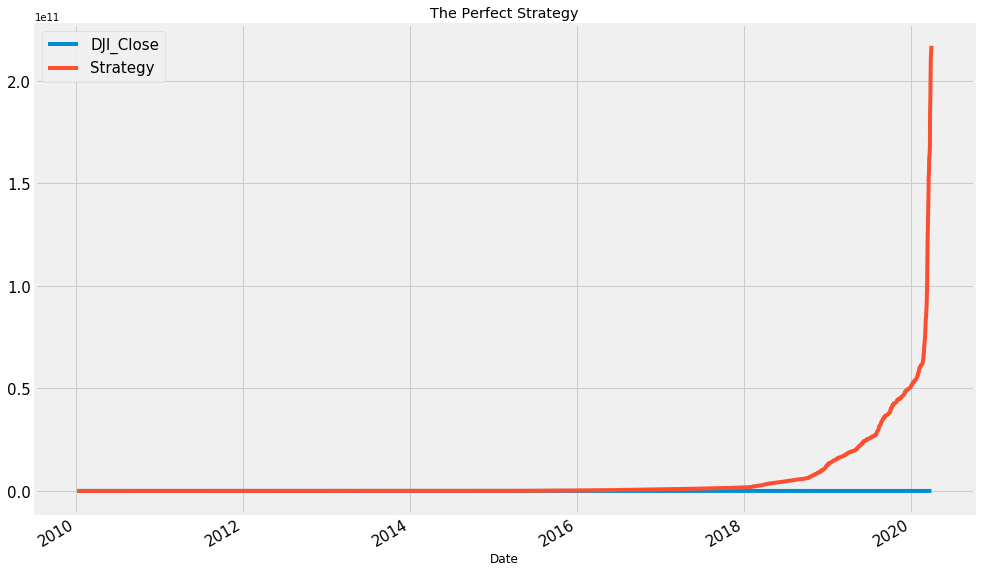

In [75]:
#Here we are plotting the closing price and the strategy together

df[["DJI_Close", "Strategy"]].plot(figsize = (15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("The Perfect Strategy")
plt.show()

In [76]:
#Here we are applying our function to the DJI Return and Strategy_Ret columns
#Looks like the Perfect Strategy has a lower risk and much greater return than buying and holding
#I should hope so if you could see the future


summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.087212,0.167896
Strategy_Ret,1.660910,0.131408
